In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.linear_model import LogisticRegression


In [2]:
data = pd.read_csv('bank.csv')
data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


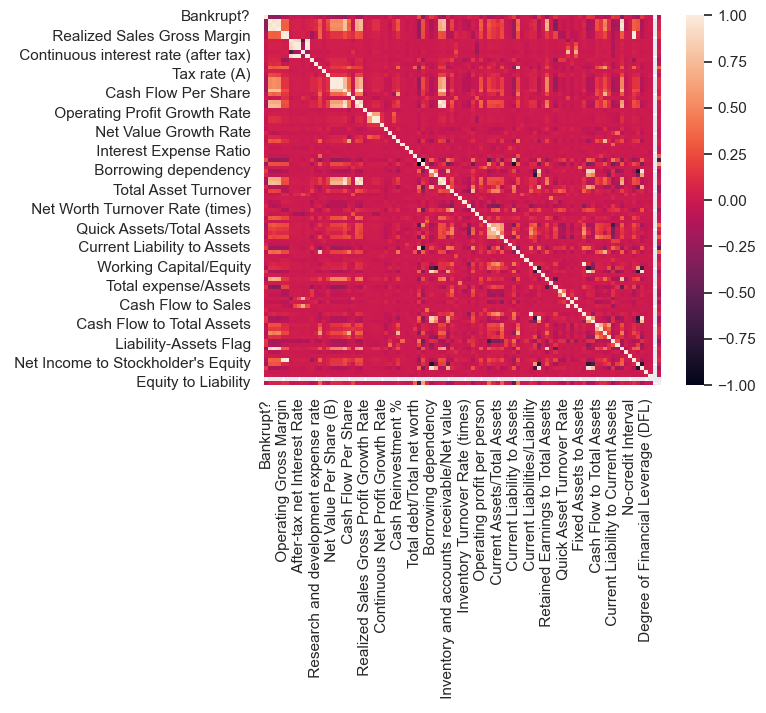

In [3]:
# here we're gonna look at the correlattion between the data since there's 96 columns
import matplotlib.pyplot as plt
import  seaborn as sns
sns.set()
sns.heatmap(data.corr())
plt.show()

In [4]:
# we drop the bankrupt column because that's what we wanna predict
X = data.drop(['Bankrupt?'], axis='columns')
y = data['Bankrupt?']


In [7]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)
logreg = LogisticRegression()
logreg.fit(xtrain, ytrain)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [9]:
logreg.score(xtest, ytest)

0.9523460410557185

In [13]:
predictions = logreg.predict(xtest)
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error 
import math

In [18]:
print(mean_absolute_error(ytest, predictions))
print(mean_squared_error(ytest, predictions))

0.047653958944281524
0.047653958944281524


In [19]:
residual = ytest - predictions


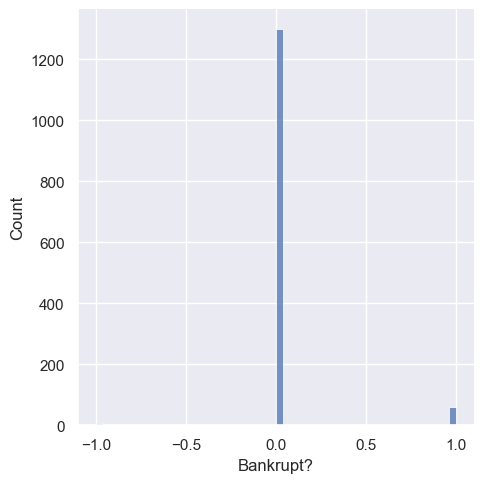

In [20]:
sns.displot(residual, bins = 50)

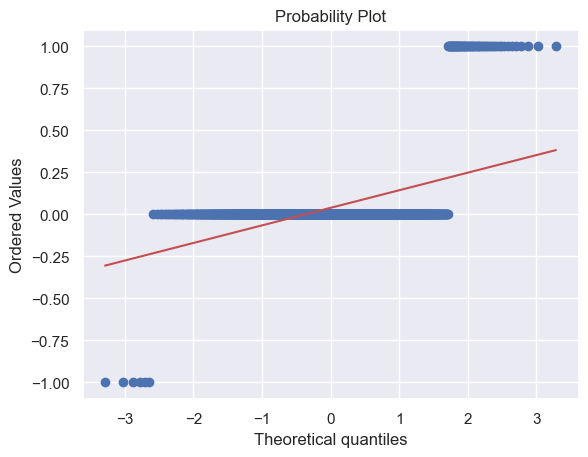

In [21]:
import pylab 
import scipy.stats as stats

stats.probplot(residual, dist = 'norm', plot= pylab)
pylab.show()